# Introduction to Object-Oriented Programming

Up until now, we've been doing things inline in our notebooks or creating functions that we call later.

Object-Oriented Programming is a style of programming that lets us encapsulate functions together with the data they operate on. 

We're going to use some third-party modules, so let's go ahead and install them:

In [1]:
!pip install numpy pandas matplotlib

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


To create our new encapsulated objects, we use Python's `class` statement to create a custom, user-defined `type`:

In [2]:
import numpy as np

class OutlierFilter():
    """
    Removes rows from a series or numpy array where the absolute z-score of a point
    is greater than some threshold.
    """
    
    def __init__(self, z_threshold=5.0):
        self.z_threshold = z_threshold
        
    def execute(self, values):
        std = np.std(values)
        mean = np.mean(values)
        z = (values - mean) / std
        return values[np.abs(z) <= self.z_threshold]
        

## Using a class

To use the class, we must first create an **instance** of the class. We do this by "calling" the class as if it were a function:

In [3]:
myfilter5 = OutlierFilter()
myfilter2 = OutlierFilter(2.0)

In [4]:
%matplotlib inline
# Generate some random data so we can see the class in action
import numpy as np
import pandas as pd
data = pd.Series(np.random.randn(100_000))
data.head()

0    0.556507
1   -1.362676
2   -0.891416
3   -0.713029
4    1.153642
dtype: float64

In [5]:
xlim = (-6,6)

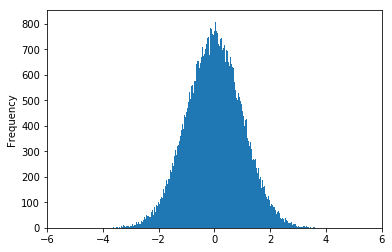

In [6]:
data.plot.hist(bins=500, xlim=xlim);

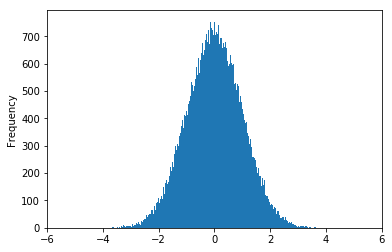

In [7]:
myfilter5.execute(data).plot.hist(bins=500, xlim=xlim);

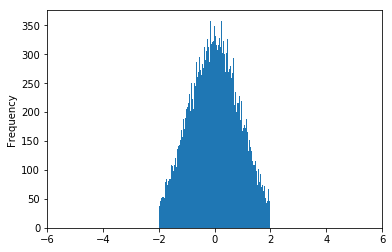

In [8]:
myfilter2.execute(data).plot.hist(bins=500, xlim=xlim);

## Anatomy of a class definition:

Let's look at the class definition in more detail:

```python
class OutlierFilter():
```

This snippet says we're defining a new type called `OutlierFilter`. We aren't creating a specialization / extension of an existing type, so the parens `()` are empty (they can also be omitted). If we were specializing an existing type, we would put the type that we are extending inside the parens.

```python
    """
    Removes rows from a series or numpy array where the absolute z-score of a point
    is greater than some threshold.
    """    
```

This is a *docstring*. It doesn't get used at execution time, but provides documentation for users of our class:

In [9]:
help(OutlierFilter)

Help on class OutlierFilter in module __main__:

class OutlierFilter(builtins.object)
 |  OutlierFilter(z_threshold=5.0)
 |  
 |  Removes rows from a series or numpy array where the absolute z-score of a point
 |  is greater than some threshold.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, z_threshold=5.0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  execute(self, values)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



Next, we have our first **method** (function attached to a class):

```python
    def __init__(self, z_threshold=5.0):
        self.z_threshold = z_threshold
```

Here, we define the class *initializer*. This sets up any *attributes* that we want to be available when we're using a particular *instance* of the class. In this case, the only attribute we're interested in is the `z_threshold`.

Note that in Python, unlike other languages such as Ruby, Java, Javascript, or C++, you *must* be explicit about the name of the instance variable. The Python convention is to call this parameter `self`, though the language does not enforce that.

Our next method defines the actual functionality of the class:
    
```python
    def execute(self, values):
        std = np.std(values)
        mean = np.mean(values)
        z = (values - mean) / std
        return values[np.abs(z) <= self.z_threshold]
```

## Common "magic" methods

You may have noticed the strange naming convention of the initializer `__init__`. Leading and trailing double underscores (pronounced "dunder") are used to mark a method as 'magic', meaning that it typically gets called *implicitly* by the Python interpreter rather than being called directly. 

While there are [many][magic-methods] different magic methods, the following are used most frequently:

- `__init__` gets called automatically called when creating an instance of the class. 
- `__repr__` gets called automatically by the `repr()` built-in function or when showing the 'representation' of an instance
- `__str__` gets called automatcially by the `str()` built-in function or when `print()`ing an instance

[magic-methods]: https://docs.python.org/3/reference/datamodel.html#special-method-names

In [10]:
print(myfilter5)

In [11]:
myfilter5

Let's add a `__repr__`:

In [12]:
class OutlierFilter():
    """
    Removes rows from a series or numpy array where the absolute z-score of a point
    is greater than some threshold.
    """
    
    def __init__(self, z_threshold=5.0):
        self.z_threshold = z_threshold
        
    def execute(self, values):
        std = np.std(values)
        mean = np.mean(values)
        z = (values - mean) / std
        return values[np.abs(z) <= self.z_threshold]
        
    def __repr__(self):
        return f'OutlierFilter(z_threshold={self.z_threshold!r})'

In [13]:
myfilter5   # myfilter5 is an instance of our *previously defined* OutlierFilter

In [14]:
myfilter5 = OutlierFilter()
myfilter2 = OutlierFilter(2.0)

In [15]:
myfilter5

OutlierFilter(z_threshold=5.0)

In [16]:
myfilter2

OutlierFilter(z_threshold=2.0)

If we have no `__str__`, Python will just use the `__repr__`, which is often good enough:

In [17]:
print(myfilter2)

OutlierFilter(z_threshold=2.0)


We can customize the `__str__` if we want:

In [18]:
class OutlierFilter():
    """
    Removes rows from a series or numpy array where the absolute z-score of a point
    is greater than some threshold.
    """
    
    def __init__(self, z_threshold=5.0):
        self.z_threshold = z_threshold
        
    def execute(self, values):
        std = np.std(values)
        mean = np.mean(values)
        z = (values - mean) / std
        return values[np.abs(z) <= self.z_threshold]
        
    def __repr__(self):
        return f'OutlierFilter(z_threshold={self.z_threshold!r})'
    
    def __str__(self):
        return f'Filter removing values with abs(z_score) > {self.z_threshold!r}'

In [19]:
myfilter5 = OutlierFilter()
myfilter2 = OutlierFilter(2.0)

In [20]:
myfilter5

OutlierFilter(z_threshold=5.0)

In [21]:
print(myfilter5)

Filter removing values with abs(z_score) > 5.0


# "Private" variables

Most of the time, we may not want to expose our attributes to the users of the class. 

The convention in Python is to use a single leading underscore to indicate that this attribute is not part of the "public" interface of the class:

In [22]:
class OutlierFilter():
    """
    Removes rows from a series or numpy array where the absolute z-score of a point
    is greater than some threshold.
    """
    
    def __init__(self, z_threshold=5.0):
        self._z_threshold = z_threshold
        
    def execute(self, values):
        std = np.std(values)
        mean = np.mean(values)
        z = (values - mean) / std
        return values[np.abs(z) <= self._z_threshold]
        
    def __repr__(self):
        return f'OutlierFilter(z_threshold={self._z_threshold!r})'
    
    def __str__(self):
        return f'Filter removing values with abs(z_score) > {self._z_threshold!r}'
    
myfilter2 = OutlierFilter(2.0)

It's not *really* private, though:

In [23]:
myfilter2._z_threshold

2.0

Occasionally you'll see code which uses **two** leading underscores to make an attribute "private":

In [24]:
class OutlierFilter():
    """
    Removes rows from a series or numpy array where the absolute z-score of a point
    is greater than some threshold.
    """
    
    def __init__(self, z_threshold=5.0):
        self.__z_threshold = z_threshold
        
    def execute(self, values):
        std = np.std(values)
        mean = np.mean(values)
        z = (values - mean) / std
        return values[np.abs(z) <= self.__z_threshold]
                
    def __repr__(self):
        return f'OutlierFilter(z_threshold={self.__z_threshold!r})'
    
    def __str__(self):
        return f'Filter removing values with abs(z_score) > {self.__z_threshold!r}'
    
myfilter2 = OutlierFilter(2.0)

In [25]:
# Are we private??

myfilter2.__z_threshold

AttributeError: 'OutlierFilter' object has no attribute '__z_threshold'

In [26]:
myfilter2._OutlierFilter__z_threshold

2.0

In [27]:
myfilter2.__dict__

{'_OutlierFilter__z_threshold': 2.0}

# Lab

Open [OOP Intro lab][oop-intro-lab]

[oop-intro-lab]: ./oop-intro-lab.ipynb